In [21]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot

In [2]:
def build_model_with_sequential():
  seq_model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation= tf.nn.softmax)
  ])

In [6]:
def build_model_with_functional():
  input_layer = tf.keras.Input(shape=(28,28))
  flatten_layer= tf.keras.layers.Flatten()(input_layer)
  first_dense=tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
  output_layer = tf.keras.layers.Dense(10, activation= tf.nn.softmax)(first_dense)
  func_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
  return func_model

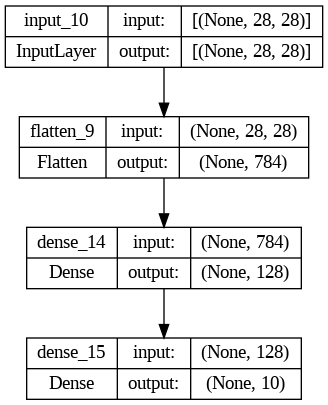

In [22]:
model = build_model_with_functional()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [24]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images/ 255.0
test_images = test_images / 255.0

In [26]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4984 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3114 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8689


[0.354362815618515, 0.8689000010490417]